<a href="https://colab.research.google.com/github/stanislawWojtas/Uczenie-Maszynowe/blob/main/lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cel/Zakres
- Przeprowadzenie regresji
- Porównanie regresorów

### Przygotowanie danych

<Axes: xlabel='x', ylabel='y'>

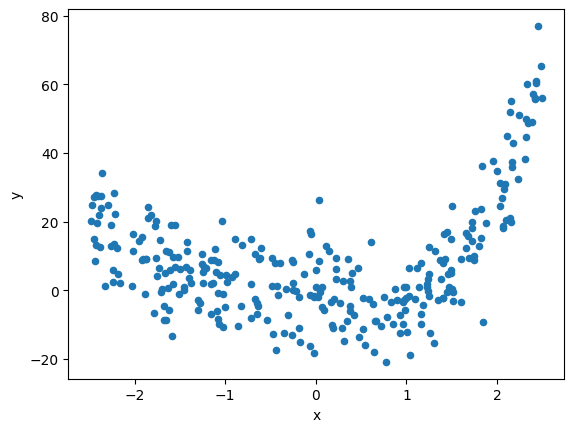

In [64]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x':X, 'y':y})
df.to_csv('dane_do_regresji.csv', index=None)
df.plot.scatter(x='x', y='y')

In [65]:
# Podział na zbiór uczący i zbiór testowy w proporcji 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regresja

####Regresja liniowa na danym zbiorze

In [66]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train.reshape(-1, 1), y_train) #reshape do 'płaskiego' kształtu (240,1)

LinearRegression()

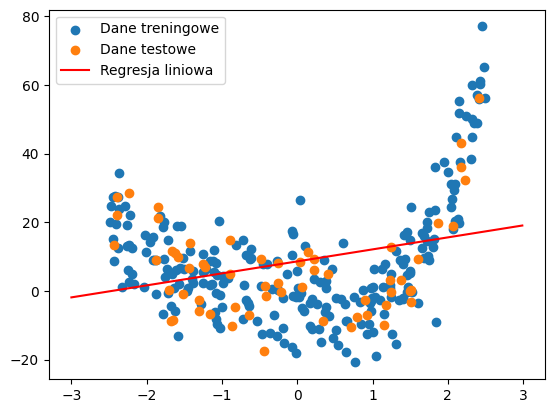

In [67]:
# Wyświetlenie wyniku
from matplotlib import pyplot as plt
plt.scatter(X_train, y_train, label='Dane treningowe')
plt.scatter(X_test, y_test, label='Dane testowe')
data = np.arange(-3, 3, 0.01).reshape(-1, 1)
plt.plot(data, lin_reg.predict(data), label='Regresja liniowa', color='red')
plt.legend()
plt.show()

In [68]:
# Stworzenie Data Frame do mean squared error
mse = pd.DataFrame(columns=["train_mse", "test_mse"], index=["lin_reg", "knn_3_reg", "knn_5_reg", "poly_2_reg", "poly_3_reg", "poly_4_reg", "poly_5_reg"])
from sklearn.metrics import mean_squared_error

In [69]:
lin_train_mse = mean_squared_error(y_train, lin_reg.predict(X_train.reshape(-1, 1)))
lin_test_mse = mean_squared_error(y_test, lin_reg.predict(X_test.reshape(-1, 1)))
mse.loc["lin_reg"] = [lin_train_mse, lin_test_mse]

#### KNN - k najbliższych sąsiadów

In [70]:
# KNN dla k = 3
from sklearn.neighbors import KNeighborsRegressor
knn_3_reg = KNeighborsRegressor(n_neighbors=3)
knn_3_reg.fit(X_train.reshape(-1, 1), y_train)

KNeighborsRegressor(n_neighbors=3)

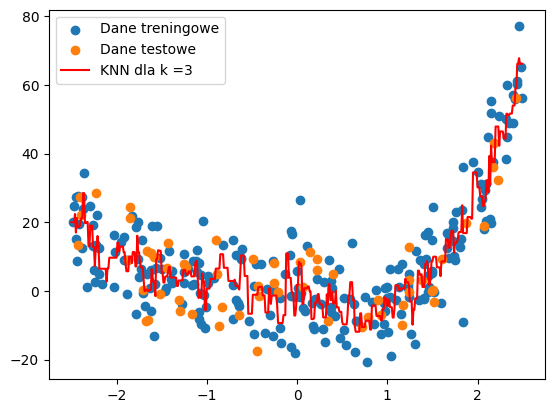

In [71]:
# Wyświetlenie wyników
plt.scatter(X_train, y_train, label='Dane treningowe')
plt.scatter(X_test, y_test, label='Dane testowe')
data = np.arange(-2.5, 2.5, 0.01).reshape(-1, 1)
plt.plot(data, knn_3_reg.predict(data), label='KNN dla k =3', color='red')
plt.legend()
plt.show()

In [72]:
# Wylicznie MNE
knn_3_train_mse = mean_squared_error(y_train, knn_3_reg.predict(X_train.reshape(-1, 1)))
knn_3_test_mse = mean_squared_error(y_test, knn_3_reg.predict(X_test.reshape(-1, 1)))
mse.loc["knn_3_reg"] = [knn_3_train_mse, knn_3_test_mse]

In [73]:
# KNN dla k = 5
knn_5_reg = KNeighborsRegressor(n_neighbors=5)
knn_5_reg.fit(X_train.reshape(-1, 1), y_train)

KNeighborsRegressor()

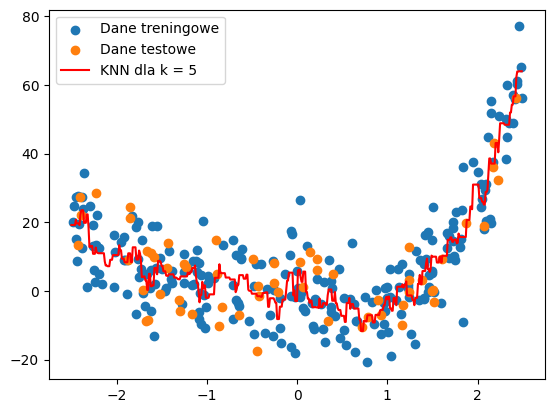

In [74]:
# Wizualizacja dla k = 5
plt.scatter(X_train, y_train, label='Dane treningowe')
plt.scatter(X_test, y_test, label='Dane testowe')
data = np.arange(-2.5, 2.5, 0.01).reshape(-1, 1)
plt.plot(data, knn_5_reg.predict(data), label='KNN dla k = 5', color='red')
plt.legend()
plt.show()

In [75]:
# Wylicznie MNE
knn_5_train_mse = mean_squared_error(y_train, knn_5_reg.predict(X_train.reshape(-1, 1)))
knn_5_test_mse = mean_squared_error(y_test, knn_5_reg.predict(X_test.reshape(-1, 1)))
mse.loc["knn_5_reg"] = [knn_5_train_mse, knn_5_test_mse]

#### Regresja wielomianowa

In [76]:
# Dla wielomianu 2 rzędu
from sklearn.preprocessing import PolynomialFeatures
# PolynomialFeatures to transformator, który generuje nowe cechy wielomianu (np jak mamy a i b i degree=2 to wygeneruje a^2, ab, a, b, b^2 [i 1 jesli include_bias=true])
poly_feature_2 = PolynomialFeatures(degree=2, include_bias=False) #nie chcemy dodawać bias bo LinearRegression() automatycznie go dodaje
# tworzymy przekształcone dane treningowe (np jak teraz mamy samo x to będzie dodane też x^2 jako druga kolumna)
X_poly_2 = poly_feature_2.fit_transform(X_train.reshape(-1, 1))
poly_2_reg = LinearRegression()
poly_2_reg.fit(X_poly_2, y_train)

LinearRegression()

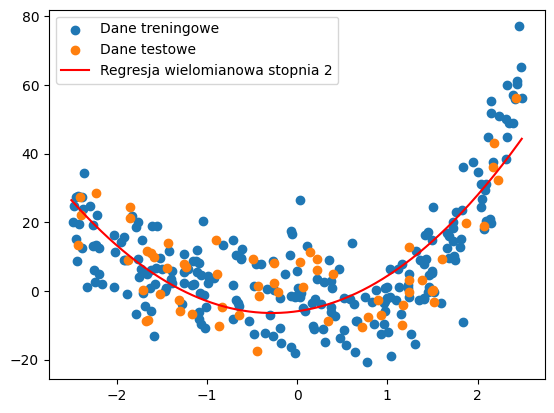

In [77]:
# Wyświetlenie wykresu dla wielomianu 2 stopnia
plt.scatter(X_train, y_train, label='Dane treningowe')
plt.scatter(X_test, y_test, label='Dane testowe')
plt.plot(data, poly_2_reg.predict(poly_feature_2.fit_transform(data)), label='Regresja wielomianowa stopnia 2', color='red')
plt.legend()
plt.show()

In [78]:
# Wylicznie MNE
poly_2_train_mse = mean_squared_error(y_train, poly_2_reg.predict(X_poly_2))
poly_2_test_mse = mean_squared_error(y_test, poly_2_reg.predict(poly_feature_2.fit_transform(X_test.reshape(-1, 1))))
mse.loc["poly_2_reg"] = [poly_2_train_mse, poly_2_test_mse]

In [79]:
# Dla wielomianu 3 rzędu
poly_feature_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly_3 = poly_feature_3.fit_transform(X_train.reshape(-1, 1))
poly_3_reg = LinearRegression()
poly_3_reg.fit(X_poly_3, y_train)

LinearRegression()

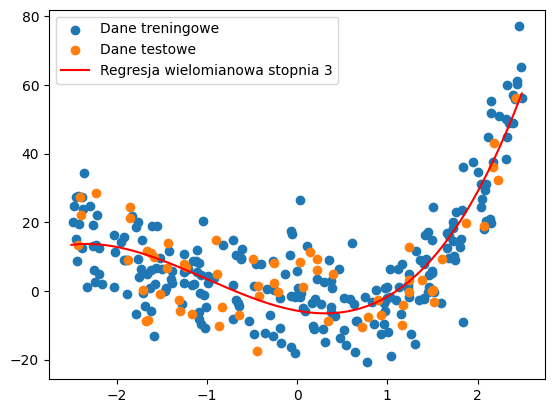

In [80]:
# Wyświetlenie wykresu dla wielomianu 2 stopnia
plt.scatter(X_train, y_train, label='Dane treningowe')
plt.scatter(X_test, y_test, label='Dane testowe')
plt.plot(data, poly_3_reg.predict(poly_feature_3.fit_transform(data)), label='Regresja wielomianowa stopnia 3', color='red')
plt.legend()
plt.show()

In [81]:
# Wylicznie MNE
poly_3_train_mse = mean_squared_error(y_train, poly_3_reg.predict(X_poly_3))
poly_3_test_mse = mean_squared_error(y_test, poly_3_reg.predict(poly_feature_3.fit_transform(X_test.reshape(-1, 1))))
mse.loc["poly_3_reg"] = [poly_3_train_mse, poly_3_test_mse]

In [82]:
# Dla wielomianu 4 rzędu
poly_feature_4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly_4 = poly_feature_4.fit_transform(X_train.reshape(-1, 1))
poly_4_reg = LinearRegression()
poly_4_reg.fit(X_poly_4, y_train)

LinearRegression()

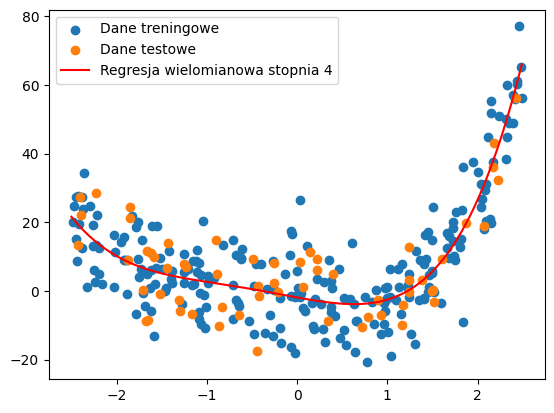

In [83]:
# Wyświetlenie wykresu dla wielomianu 2 stopnia
plt.scatter(X_train, y_train, label='Dane treningowe')
plt.scatter(X_test, y_test, label='Dane testowe')
plt.plot(data, poly_4_reg.predict(poly_feature_4.fit_transform(data)), label='Regresja wielomianowa stopnia 4', color='red')
plt.legend()
plt.show()

In [84]:
# Wylicznie MNE
poly_4_train_mse = mean_squared_error(y_train, poly_4_reg.predict(X_poly_4))
poly_4_test_mse = mean_squared_error(y_test, poly_4_reg.predict(poly_feature_4.fit_transform(X_test.reshape(-1, 1))))
mse.loc["poly_4_reg"] = [poly_4_train_mse, poly_4_test_mse]

In [85]:
# Dla wielomianu 5 rzędu
poly_feature_5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly_5 = poly_feature_5.fit_transform(X_train.reshape(-1, 1))
poly_5_reg = LinearRegression()
poly_5_reg.fit(X_poly_5, y_train)

LinearRegression()

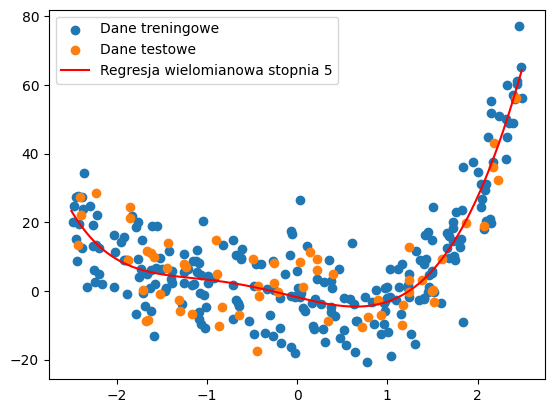

In [86]:
# Wyświetlenie wykresu dla wielomianu 2 stopnia
plt.scatter(X_train, y_train, label='Dane treningowe')
plt.scatter(X_test, y_test, label='Dane testowe')
plt.plot(data, poly_5_reg.predict(poly_feature_5.fit_transform(data)), label='Regresja wielomianowa stopnia 5', color='red')
plt.legend()
plt.show()

In [87]:
# Wylicznie MNE
poly_5_train_mse = mean_squared_error(y_train, poly_5_reg.predict(X_poly_5))
poly_5_test_mse = mean_squared_error(y_test, poly_5_reg.predict(poly_feature_5.fit_transform(X_test.reshape(-1, 1))))
mse.loc["poly_5_reg"] = [poly_5_train_mse, poly_5_test_mse]
mse

,train_mse,test_mse
lin_reg,273.27443,199.782569
knn_3_reg,55.929709,72.97293
knn_5_reg,67.514997,71.865184
poly_2_reg,114.652291,98.47228
poly_3_reg,85.119434,86.705433
poly_4_reg,74.354375,67.19806
poly_5_reg,73.978622,68.931267


Zapisanie Data Frame z MSE do pliku Pickle

In [88]:
import pickle
with open('mse.pkl', 'wb') as file:
  pickle.dump(mse, file)

In [89]:
# zapisanie listy krotek modeli do pliku pkl
models = [(lin_reg, None), (knn_3_reg, None), (knn_5_reg, None), (poly_2_reg, poly_feature_2), (poly_3_reg, poly_feature_3), (poly_4_reg, poly_feature_4), (poly_5_reg, poly_feature_5)]
with open('reg.pkl', 'wb') as file:
  pickle.dump(models, file)